<a href="https://colab.research.google.com/github/RahulJuluru2/unit3assignments/blob/main/U3W13_24_Single_Image_Convolution_C_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective

At the end of the experiment, you will be able to:

* understand the output at each layer in convolutional neural network
* implement the ConvNet using PyTorch


In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Single_Image_Convolution_Walkthrough.mp4" type="video/mp4">
</video>
""")

## Setup Steps

In [ ]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id="2216842"#@param{type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password="9959488784"#@param{type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "U3W13_24_Single_Image_Convolution_C" #name of the notebook

def setup(): 
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Parrot1.jpg")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Basic Pytorch packages

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**torch.nn.functional:** This package includes non-linear functions like ReLu and sigmoid

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially. 





In [ ]:
from PIL import Image             # Python Image library
import torch.nn.functional as F
import torch.nn as nn
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt

## Loading Image using PIL Package

In [ ]:
image = Image.open('/content/Parrot1.jpg')

In [ ]:
# The height and width of the image
image.size

(600, 600)

**Defining Transformations**

We will use `transform.compose()` to combine all the image transformations at one place.

`transforms.ToTensor()` is used to convert the images into tensor values. 

`transforms.Resize(`) is used to resize the image.

In [ ]:
data_transforms = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        ])
img = data_transforms(image)

# The original image is reshaped from (600, 600) to (256, 256)
img.shape

torch.Size([3, 256, 256])

In [ ]:
# Printing the tensor values of an image
img

tensor([[[0.4824, 0.4824, 0.4784,  ..., 0.2980, 0.2902, 0.2784],
         [0.4902, 0.4902, 0.4863,  ..., 0.3020, 0.2941, 0.2784],
         [0.4941, 0.4941, 0.4902,  ..., 0.3059, 0.2980, 0.2784],
         ...,
         [0.6157, 0.6627, 0.6039,  ..., 0.2235, 0.2235, 0.2235],
         [0.6353, 0.6745, 0.7216,  ..., 0.2235, 0.2235, 0.2235],
         [0.7137, 0.7490, 0.7059,  ..., 0.2235, 0.2235, 0.2235]],

        [[0.5529, 0.5529, 0.5529,  ..., 0.4078, 0.4000, 0.3922],
         [0.5608, 0.5608, 0.5608,  ..., 0.4118, 0.4039, 0.3922],
         [0.5608, 0.5647, 0.5608,  ..., 0.4157, 0.4078, 0.3922],
         ...,
         [0.5569, 0.6078, 0.5608,  ..., 0.3451, 0.3451, 0.3451],
         [0.5765, 0.6196, 0.6784,  ..., 0.3451, 0.3451, 0.3451],
         [0.6549, 0.6941, 0.6627,  ..., 0.3451, 0.3451, 0.3451]],

        [[0.1216, 0.1216, 0.1255,  ..., 0.1137, 0.1059, 0.0941],
         [0.1294, 0.1333, 0.1373,  ..., 0.1176, 0.1098, 0.0980],
         [0.1373, 0.1412, 0.1373,  ..., 0.1216, 0.1137, 0.

## Visualize the Image

permute() function is used to re-arrange the order of dimension of the image. matplotlib works fine even without conversion to numpy array. But PyTorch Tensors (Image tensors) are channel first, so to use them with matplotlib need to reshape it:

torch.Size([3, 256, 256])
torch.Size([256, 256, 3])


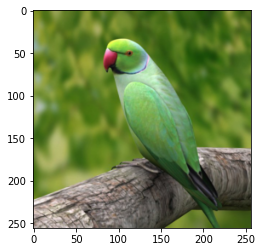

In [ ]:
print(img.shape)
print(img.permute(1, 2, 0).shape)

plt.imshow(img.permute(1, 2, 0)) # In permute(1, 2, 0), 2 is the width; 1 is the height; 0 is the channel of the image
plt.show()

## Building a Convolutional Neural Network with PyTorch

ConvNet is a sequence of layers, and every layer of a ConvNet transforms one volume of activations to another through a differentiable function. We use three main types of layers to build ConvNet architectures: Convolutional Layer, Pooling Layer, and Fully-Connected Layer. We will stack these layers to form a full ConvNet architecture.









**Convolution Layer**   is the first filter applied as part of the feature-engineering step which applies a filter to our image. We pass over a mini image, usually called a kernel, and output the resulting, filtered subset of our image.

Output formula for convolutional,   $O = \frac{W- K + 2P}{S} +1$

*   O : output height/length
*   W : input height/length
*   K : filter size (kernel size)
*   P : padding 
*   S : stride


**Pooling Layer**  function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence also control overfitting. The Pooling Layer operates independently on every depth slice of the input and resizes it spatially, using the MAX operation.

Output formula for Pooling, $O = \frac{W- K}{S} +1$   

If using PyTorch default stride (default stride is same as kernel size), then output formula for pooling will result,  $O = \frac{W}{K}$


![Capture](https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Single_Image_Colvolution.PNG)

Output after Convolutional layer 1 = $\frac{256-3+ 2(1)}{1}+1 = 256$

Output after Convolutional layer 2 = $\frac{256-3+ 2(1)}{1}+1 = 256$

Output after Maxpool layer 1 = $\frac{256-3}{2}+1 = 127$

#### Let's understand how each layer of CNN works while passing an Image

Output of convolutional layer with Stride 1 and padding 1

In [ ]:
# Defining a 2D conv layer with input_channels= 3, out_channel= 3, filter= 3, stride= 1 and padding= 1
cnn2d = nn.Conv2d(in_channels= 3, out_channels= 3, kernel_size= 3, stride= 1, padding= 1)

cnn1_output = cnn2d(img.unsqueeze(0))
print(cnn1_output.shape)

torch.Size([1, 3, 256, 256])


Output of Maxpool Layer

In [ ]:
# Defining a maxpool layer with filter size= 3
Max_pool = nn.MaxPool2d(kernel_size=3)
maxpool_output = Max_pool(cnn1_output)
maxpool_output.shape

torch.Size([1, 3, 85, 85])

#### Defining ConvNet Architecture

Considering two convolutional layers, 1 maxpool layer for building an architecture. The output of first conv layer will be the input of the second conv layer. Applying relu for the output of the second conv layer and then maxpool.


In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        # Initialze convolutional layer1 with filter size 3, stride 1 and padding 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=1)

        self.conv2 = nn.Conv2d(in_channels=6, out_channels=3, kernel_size=3, stride=1, padding=1)

        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2) 

    def forward(self, x):

        # Convolutional layer1 
        out = self.conv1(x)
        print("conv1", out.shape)

        # Convolutional layer2
        out = self.conv2(out)
        print("conv2", out.shape)

        # Activation Function 
        out = F.relu(out)

        # Maxpool layer
        out = self.maxpool1(out)
        
        return out

# Initializing the network by creating an instance
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)


Pass the image through the model and get the output

In [ ]:
output = net(img.unsqueeze(0))
output.shape

conv1 torch.Size([1, 6, 256, 256])
conv2 torch.Size([1, 3, 256, 256])


torch.Size([1, 3, 127, 127])

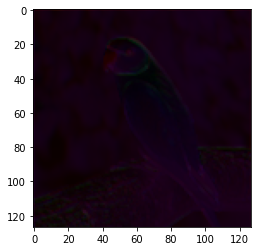

In [ ]:
# Color image after maxpooling. Multiple execution will result in different intensity of the colors.
plt.imshow((output[0].permute(1,2,0)).data.numpy())
plt.show()

**Summary:** In the above experiment we have seen representation of images using ConvNet architecture (filters at different layers and the output of each layer i.e. convolution of image at each layer). CNN extracts the feature of image and convert it into lower dimension without loosing its characteristics. Image classification using CNN can be seen in further experiments

# Please answer the questions below to complete the experiment:




In [ ]:
#@title State True or False: Convolutional Layer creates several smaller picture windows to go over the data{ run: "auto", form-width: "500px", display-mode: "form" }
Answer = "TRUE" #@param ["","TRUE","FALSE"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything is good" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]
